In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
gend=pd.read_csv('gender_submission.csv')
#train.drop('PassengerId',axis=1, inplace=True)

def threshold(x):
    x[x>0.7]=1
    x[x<=0.7]=0
    return x

def prepare_data(a_data):
    titles = set()
    titlesall=[]
    for name in a_data['Name']:
        titlesall.append(name.split(',')[1].split('.')[0].strip())
        titles.add(name.split(',')[1].split('.')[0].strip())

    copytitles=set(titles)
    for title in copytitles:    
        if titlesall.count(title)<2:
            titles.remove(title)
    a_data['Title'] = a_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())    
    a_data.drop('Name',axis=1, inplace=True)

    a_data['Age'] = a_data.groupby(['Sex','Pclass','Title'])['Age'].transform(lambda x: x.fillna(x.median()))
    a_data['Fare'] = a_data.groupby(['Sex','Pclass','Title'])['Fare'].transform(lambda x: x.fillna(x.median())) 

    titles_dummies = pd.get_dummies(a_data['Title'])
    a_data = pd.concat([a_data, titles_dummies], axis=1)
    a_data.drop('Title', axis=1, inplace=True)

    
    a_data['Embarked'] = a_data['Embarked'].fillna('S')
    titles_dummies = pd.get_dummies(a_data['Embarked'])
    a_data = pd.concat([a_data, titles_dummies], axis=1)
    a_data.drop('Embarked', axis=1, inplace=True)

    titles_dummies = pd.get_dummies(a_data['Pclass'],prefix='pclass')
    a_data = pd.concat([a_data, titles_dummies], axis=1)
    a_data.drop('Pclass', axis=1, inplace=True)

    a_data['Sex']=LabelEncoder().fit_transform(a_data['Sex'])
    
    a_data['Age']  = a_data['Age'].fillna(a_data['Age'].median())
    a_data['Fare'] = a_data['Fare'].fillna(a_data['Fare'].median())

    a_data['Age2']  = a_data['Age']**2
    a_data['Fare2'] = a_data['Fare']**2
 
    a_data['FA']  = a_data['Fare']/a_data['Age']
    
    return a_data
test.insert(1,'Survived',1)
train = prepare_data(pd.concat([train ,test]))
test = train[891:]
train = train[:891]
#test = prepare_data(test)

In [5]:
features = ['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Col', 'Dr', 'Master', 'Miss',  'Mr', 'Mrs', 'Ms', 'Rev', 'C', 'Q', 'S', 'pclass_1', 'pclass_2', 'pclass_3']

#['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
Xtrain, Xcross, Xtest = np.split(train.sample(frac=1), [int(0.7*len(train)), int(0.85*len(train))])
Ytrain = Xtrain['Survived']
Ycross = Xcross['Survived']
Ytest = Xtest['Survived']

Xtrain = Xtrain[features]
Xcross = Xcross[features]
Xtest = Xtest[features]

Xfinal = train[features]
Yfinal = train['Survived']



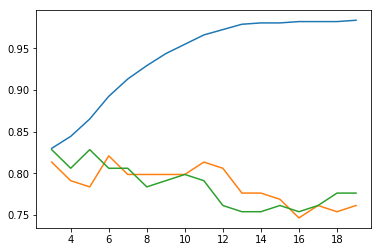

In [6]:
tp=[]
cp=[]
tt=[]
r=range(3,20)
for i in r:
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(Xtrain,Ytrain)
    tp.append(accuracy_score(Ytrain, model.predict(Xtrain)))
    #print("Trainning accuracy", tp[i])
    cp.append(accuracy_score(Ycross, model.predict(Xcross)))
    #print("Cross validation accuracy", cp[i])
    tt.append(accuracy_score(Ytest, model.predict(Xtest)))
    
plt.plot(r,tp)
plt.plot(r,cp)
plt.plot(r,tt)
plt.show()

In [3]:
    model=DecisionTreeClassifier(max_depth=4)
    model.fit(Xtrain,Ytrain)

NameError: name 'Xtrain' is not defined

In [7]:
Xtrain=Xfinal
Ytrain=Yfinal


def NN():
    global model, predictcross, predict
    np.random.seed(8)
    model=Sequential()
    model.add(Dense(x,input_dim=19,activation='relu'))
    for lev in range(0,l):
        model.add(Dense(y,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(Xtrain, Ytrain, epochs=250, batch_size=10, verbose=0)
    predict=model.predict(Xtrain)
    predictcross=model.predict(Xcross)
    threshold(predict)
    threshold(predictcross)
    temp1=accuracy_score(Ytrain, predict)
    temp=accuracy_score(Ycross, predictcross)
    print(x,'-', y, '-',l,'   ', temp1 , '  ',temp)
    return temp1


maxVal=0.
d1=0
d2=0
d3=0

for x in range(20,40,2):
    for y in range(20,40,2):
        for l in range(10,50,5):
            score=NN()
            if score>maxVal:
                maxVal=score
                d1=x
                d2=y
                d3=l
#x=10
#y=12
#l=3
#NN()

predicttest=model.predict(Xtest)
threshold(predicttest)

#print(accuracy_score(Ytrain, predict))
#print(accuracy_score(Ycross, predictcross))
print("best fit are ", d1, d2, d3)
x=d1
y=d2
l=d3
NN()
print("test score is ", accuracy_score(Ytest, predicttest))


20 - 20 - 10     0.8484848484848485    0.8432835820895522
20 - 20 - 15     0.8529741863075196    0.8507462686567164
20 - 20 - 20     0.8664421997755332    0.8507462686567164
20 - 20 - 25     0.8170594837261503    0.8134328358208955
20 - 20 - 30     0.8395061728395061    0.8283582089552238
20 - 20 - 35     0.6161616161616161    0.6940298507462687
20 - 20 - 40     0.8327721661054994    0.8507462686567164
20 - 20 - 45     0.6161616161616161    0.6940298507462687
20 - 22 - 10     0.8451178451178452    0.835820895522388
20 - 22 - 15     0.8462401795735129    0.8283582089552238
20 - 22 - 20     0.8484848484848485    0.8582089552238806
20 - 22 - 25     0.7620650953984287    0.7686567164179104
20 - 22 - 30     0.8507295173961841    0.8432835820895522
20 - 22 - 35     0.8148148148148148    0.835820895522388
20 - 22 - 40     0.8395061728395061    0.835820895522388
20 - 22 - 45     0.6161616161616161    0.6940298507462687
20 - 24 - 10     0.8439955106621774    0.8283582089552238
20 - 24 - 15     

KeyboardInterrupt: 

In [222]:
model.fit(Xfinal, Yfinal, epochs=250, batch_size=10, verbose=0)
predictcross=model.predict(Xcross)
threshold(predictcross)
accuracy_score(Ycross, predictcross)

0.87709497206703912

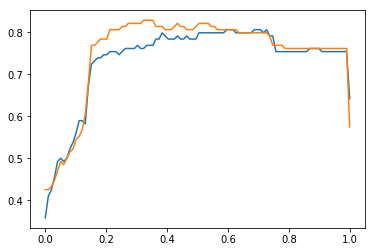

In [39]:
y=[]
y2=[]
predictcross=model.predict(Xcross)
predicttest=model.predict(Xtest)
lin=np.linspace(0,1,100)
for x in lin:
    result= np.array(predictcross)
    result[result>x] = 1
    result[result<=x] = 0
    y.append(accuracy_score(Ycross, result))
    result2= np.array(predicttest)
    result2[result2>x] = 1
    result2[result2<=x] = 0
    y2.append(accuracy_score(Ytest, result2))


fig = plt.figure(2)
#ax1=fig.subplot(211)
#ax2=fig.subplot(212)
#plt.subplot(211)
plt.plot(lin,y)
plt.plot(lin,y2)
plt.show()

In [43]:
x=20
y=30
l=15
np.random.seed(8)
model=Sequential()
model.add(Dense(x,input_dim=19,activation='relu'))
for lev in range(0,l):
    model.add(Dense(y,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(Xtrain, Ytrain, epochs=300, batch_size=10, verbose=0)
predict=model.predict(Xtrain)
predictcross=model.predict(Xcross)
threshold(predict)
threshold(predictcross)
temp=accuracy_score(Ycross, predictcross)
print(x,'-', y, '-',l,'   ', accuracy_score(Ytrain, predict), '  ',temp)

predicttest=model.predict(Xtest)
threshold(predicttest)
print("test score is ", accuracy_score(Ytest, predicttest))

20 - 30 - 15     0.879614767255    0.798507462687
test score is  0.783582089552


In [47]:
def threshold(x):
    x[x>0.8]=1
    x[x<=0.8]=0
    return x
out= model.predict(test[features])
threshold(out)
outdata=pd.DataFrame()
outdata['PassengerId']=test['PassengerId']
outdata['Survived']=out.astype(int)
outdata[['PassengerId','Survived']].to_csv('result.csv', index=False)

In [41]:
import xgboost as xgb
def XGB():
    global model, predictcross, predict
    np.random.seed(8)
    model = xgb.XGBClassifier(max_depth=depth, n_estimators=300, learning_rate=lrate)
    model.fit(Xtrain, Ytrain)
    predict=model.predict(Xtrain)
    predictcross=model.predict(Xcross)
    temp=accuracy_score(Ycross, predictcross)
    predicttest=model.predict(Xtest)
    temp2=accuracy_score(Ytest, predicttest)
    print(depth,'-', lrate,'   ', accuracy_score(Ytrain, predict), '  ',temp, '  ', temp2)
    return 0.5*(temp+temp2)


maxVal=0.
d1=0
d2=0

lratespace = np.linspace(0.001,0.5,100)
for depth in range(2,5,1):
    for lrate in lratespace:
            score=XGB()
            if score>maxVal:
                maxVal=score
                d1=depth
                d2=lrate
                


#print(accuracy_score(Ytrain, predict))
#print(accuracy_score(Ycross, predictcross))
print("best fit are ", d1, d2)
depth=d1
lrate=d2
XGB()
predicttest=model.predict(Xtest)
print("test score is ", accuracy_score(Ytest, predicttest))



2 - 0.001     0.791332263242    0.746268656716    0.776119402985
2 - 0.0060404040404     0.828250401284    0.791044776119    0.84328358209
2 - 0.0110808080808     0.84911717496    0.798507462687    0.835820895522
2 - 0.0161212121212     0.863563402889    0.798507462687    0.828358208955
2 - 0.0211616161616     0.868378812199    0.783582089552    0.805970149254
2 - 0.026202020202     0.866773675762    0.783582089552    0.805970149254
2 - 0.0312424242424     0.869983948636    0.791044776119    0.828358208955
2 - 0.0362828282828     0.869983948636    0.776119402985    0.835820895522
2 - 0.0413232323232     0.876404494382    0.783582089552    0.84328358209
2 - 0.0463636363636     0.876404494382    0.791044776119    0.84328358209
2 - 0.051404040404     0.886035313002    0.783582089552    0.835820895522
2 - 0.0564444444444     0.884430176565    0.783582089552    0.828358208955
2 - 0.0614848484848     0.886035313002    0.783582089552    0.828358208955
2 - 0.0665252525253     0.889245585875   

3 - 0.0715656565657     0.91492776886    0.776119402985    0.820895522388
3 - 0.0766060606061     0.913322632424    0.776119402985    0.813432835821
3 - 0.0816464646465     0.92455858748    0.768656716418    0.828358208955
3 - 0.0866868686869     0.92455858748    0.776119402985    0.820895522388
3 - 0.0917272727273     0.927768860353    0.783582089552    0.805970149254
3 - 0.0967676767677     0.92455858748    0.761194029851    0.813432835821
3 - 0.101808080808     0.92937399679    0.768656716418    0.828358208955
3 - 0.106848484848     0.930979133226    0.768656716418    0.820895522388
3 - 0.111888888889     0.937399678973    0.768656716418    0.805970149254
3 - 0.116929292929     0.9341894061    0.768656716418    0.813432835821
3 - 0.12196969697     0.935794542536    0.776119402985    0.813432835821
3 - 0.12701010101     0.937399678973    0.761194029851    0.820895522388
3 - 0.132050505051     0.942215088283    0.761194029851    0.805970149254
3 - 0.137090909091     0.942215088283    

4 - 0.132050505051     0.972712680578    0.768656716418    0.783582089552
4 - 0.137090909091     0.971107544141    0.776119402985    0.791044776119
4 - 0.142131313131     0.972712680578    0.768656716418    0.791044776119
4 - 0.147171717172     0.972712680578    0.768656716418    0.783582089552
4 - 0.152212121212     0.974317817014    0.791044776119    0.798507462687
4 - 0.157252525253     0.975922953451    0.791044776119    0.776119402985
4 - 0.162292929293     0.974317817014    0.783582089552    0.798507462687
4 - 0.167333333333     0.974317817014    0.761194029851    0.768656716418
4 - 0.172373737374     0.977528089888    0.776119402985    0.805970149254
4 - 0.177414141414     0.977528089888    0.761194029851    0.791044776119
4 - 0.182454545455     0.979133226324    0.768656716418    0.798507462687
4 - 0.187494949495     0.979133226324    0.776119402985    0.791044776119
4 - 0.192535353535     0.980738362761    0.768656716418    0.798507462687
4 - 0.197575757576     0.977528089888 

In [54]:
depth=3
lrate=0.24
XGB()
predicttest=model.predict(Xtest)
print("test score is ", accuracy_score(Ytest, predicttest))

3 - 0.24     0.958266452648    0.820895522388    0.84328358209
test score is  0.84328358209


In [42]:
out= model.predict(test[features])
outdata=pd.DataFrame()
outdata['PassengerId']=test['PassengerId']
outdata['Survived']=out.astype(int)
outdata[['PassengerId','Survived']].to_csv('result.csv', index=False)